# Data exploration 

---

Group name: Gruppe G (Thomas Wolpert, Sven Ritzmann)

---


## Introduction

The data presented here compares the number of people who registered to vote in the early months of 2020 to the number who registered in early 2016 in 11 states and Washington D.C. It should be noted that data on voter registration in other states was not available. The data includes figures from January through April for all 12 jurisdictions, and through May for four states and Washington D.C.

## Setup

In [59]:
# Import relevant libraries
import pandas as pd
from pathlib import Path
import numpy as np
import warnings
import altair as alt
import seaborn as sns 
from vega_datasets import data

In [60]:
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

## Import data

In [61]:
# Create path
PARENT_PATH = str(Path().resolve().parent) + "/"
PATH = "data/"
SUBPATH = "external/"
FILE = "data"
FORMAT = ".csv"

# Import CSV file with pandas
df = pd.read_csv(PARENT_PATH + PATH + SUBPATH + FILE + FORMAT)

### Data structure

In [62]:
# Data overview
df.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [64]:
# Shape of the data
df.shape

(106, 4)

In [65]:
# Desciption of numerical features
df.describe()

,Year,New registered voters
count,106.000000,106.000000
mean,2018.000000,48223.462264
std,2.009501,48596.080089
min,2016.000000,589.000000
25%,2016.000000,19137.500000
50%,2018.000000,33301.500000
75%,2020.000000,55257.500000
max,2020.000000,238281.000000


In [66]:
# Info on categorical variables
df.describe(include=[object, "category"])

,Jurisdiction,Month
count,106,106
unique,12,5
top,District of Columbia,Jan
freq,10,24


In [67]:
# column names
df.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

In [68]:
# Check for missing values
df_missing = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))

| Feature  | DataType   | Description |
|---|---|---|
| Jurisdiction | Categorial | Jurisdiction |
| Year	| Numerical | 	Year of data collection | 
| Month	| Categorial | 	Month of data collection | 
| New registered voters	| Numerical | New registered voters|

In [69]:
# Data overview
df.columns

Index(['Jurisdiction', 'Year', 'Month', 'New registered voters'], dtype='object')

MissingValues (yellow):


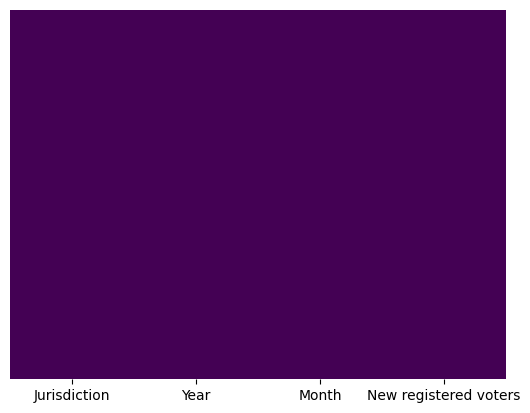

In [70]:
# show missing values (missing values - if present - will be displayed in yellow)
print('MissingValues (yellow):')
sns.heatmap(df.isnull(), 
            yticklabels=False,
            cbar=False, 
            cmap='viridis');


This Heatmap is used to give a quick overview if there are any missing values in the dataset.

No data or column needs to be dropped because there are all values inplace


### Data corrections

In [71]:
#clean column names
df.columns = df.columns.str.replace(r"^ +| $", r"", regex=True)
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [72]:
month_map = {
    'Jan': 1, 
    'Feb': 2, 
    'Mar': 3, 
    'Apr': 4, 
    'May': 5,
    'Jun': 6, 
    'Jul': 7, 
    'Aug': 8, 
    'Sep': 9, 
    'Oct': 10, 
    'Nov': 11, 
    'Dec': 12 
}

# apply the mapping to the 'Month' column of the dataframe
df['month'] = df['month'].replace(month_map)

Hot Encode objects

In [73]:
# Hot Encode objects educ
df_hec = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns)

In [74]:
df_hec

,year,month,new_registered_voters,jurisdiction_Arizona,jurisdiction_California,jurisdiction_Colorado,jurisdiction_Delaware,jurisdiction_District of Columbia,jurisdiction_Florida,jurisdiction_Georgia,jurisdiction_Illinois,jurisdiction_Maryland,jurisdiction_North Carolina,jurisdiction_Texas,jurisdiction_Virginia
0,2016,1,25852,1,0,0,0,0,0,0,0,0,0,0,0
1,2016,2,51155,1,0,0,0,0,0,0,0,0,0,0,0
2,2016,3,48614,1,0,0,0,0,0,0,0,0,0,0,0
3,2016,4,30668,1,0,0,0,0,0,0,0,0,0,0,0
4,2020,1,33229,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2020,1,25934,0,0,0,0,0,0,0,0,0,0,0,1
102,2020,2,29507,0,0,0,0,0,0,0,0,0,0,0,1
103,2020,3,31492,0,0,0,0,0,0,0,0,0,0,0,1
104,2020,4,5467,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
df_hec.columns

Index(['year', 'month', 'new_registered_voters', 'jurisdiction_Arizona',
       'jurisdiction_California', 'jurisdiction_Colorado',
       'jurisdiction_Delaware', 'jurisdiction_District of Columbia',
       'jurisdiction_Florida', 'jurisdiction_Georgia', 'jurisdiction_Illinois',
       'jurisdiction_Maryland', 'jurisdiction_North Carolina',
       'jurisdiction_Texas', 'jurisdiction_Virginia'],
      dtype='object')

## Exploratory data analysis

In [76]:
# summary statistics for all numerical columns already hot encoded
round(df_hec.describe(),2).transpose()

,count,mean,std,min,25%,50%,75%,max
year,106.0,2018.00,2.01,2016.0,2016.0,2018.0,2020.0,2020.0
month,106.0,2.74,1.30,1.0,2.0,3.0,4.0,5.0
new_registered_voters,106.0,48223.46,48596.08,589.0,19137.5,33301.5,55257.5,238281.0
jurisdiction_Arizona,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_California,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Colorado,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Delaware,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_District of Columbia,106.0,0.09,0.29,0.0,0.0,0.0,0.0,1.0
jurisdiction_Florida,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
jurisdiction_Georgia,106.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0


In [77]:
#add longitude latitute
df_map = df.copy()

In [78]:
# preperation for the map chart show jurisdication and all new_registered_voters
df_map = pd.DataFrame(df_map.groupby(["jurisdiction", "year"])["new_registered_voters"].sum().reset_index())
df_map

,jurisdiction,year,new_registered_voters
0,Arizona,2016,156289
1,Arizona,2020,126203
2,California,2016,550707
3,California,2020,605656
4,Colorado,2016,85562
5,Colorado,2020,78658
6,Delaware,2016,15578
7,Delaware,2020,9753
8,District of Columbia,2016,20371
9,District of Columbia,2020,12113


In [79]:
# add data from another dataset to visualizate it better
state_id = data.population_engineers_hurricanes()
state_id.drop(columns=["population","engineers","hurricanes"], inplace=True)
display(state_id.head())

,state,id
0,Alabama,1
1,Alaska,2
2,Arizona,4
3,Arkansas,5
4,California,6


In [80]:
# add the country id
country_id = list()
for index_map, row in df_map.iterrows():
    for index_state, state in state_id.iterrows():
        if state['state'] == row['jurisdiction']:
            country_id.append(state['id'])
            break
df_map['country_id'] = country_id

In [81]:
df_map_all = df_map.groupby(['jurisdiction', 'country_id'])['new_registered_voters'].sum().reset_index()
df_map_all

,jurisdiction,country_id,new_registered_voters
0,Arizona,4,282492
1,California,6,1156363
2,Colorado,8,164220
3,Delaware,10,25331
4,District of Columbia,11,32484
5,Florida,12,526945
6,Georgia,13,292833
7,Illinois,17,454723
8,Maryland,24,221335
9,North Carolina,37,560408


In [82]:
# show the data in a map

states = alt.topo_feature(data.us_10m.url, feature='states')

map = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).project('albersUsa').properties(
    width=500,
    height=300,
    title="Overview of the weighting of newly registered voters of individual states from 2016 to 2020"
)
map_points = alt.Chart(states).mark_geoshape().encode(
    color='new_registered_voters:Q',
    tooltip = ['new_registered_voters:Q', 'jurisdiction:N']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df_map_all, 'country_id', list(df_map_all.columns))
).properties(
    width=500,
    height=300,
).project(
    type='albersUsa'
)

(map + map_points).configure_title(
            fontSize=14,
            anchor='start',
            color='black'
        )


alt.LayerChart(...)

This map was used to visualize the data from each state that the dataset contains.

It is intended to provide a simple initial overview of how the distribution and weighting of each new registered voter look like.

In [83]:
def getLineChart(df):
    runtime_Line = alt.Chart(df).mark_line().encode(
    x = alt.X(f'year', axis=alt.Axis(title="year")),
    y = alt.Y(f'sum(new_registered_voters)', axis=alt.Axis(title=(f'cout of'))),
    color = alt.value('purple')
    ).properties(
            width=100,
            height=100,
            title={
            "text": [f"new_registered_voters"]
            }
        ).interactive()

    runtime_point = alt.Chart(df).mark_circle().encode(
        x = alt.X('year'),
        y = alt.Y(f'sum(new_registered_voters)'),
        tooltip=f'sum(new_registered_voters)'
    ).interactive()
    return ((runtime_Line + runtime_point))

In [84]:
# bar chart before covid after covid
alt.Chart(df).mark_bar().encode(
    x='sum(new_registered_voters):Q',
    y='year:O',
    color='year:N',
    row='jurisdiction:N',
    tooltip="new_registered_voters"
).properties(
        width=400, 
        height=50,
        title={
            "text": [f"new registered voters of the years 2016 and 2020 for the specific juristications"]
            }
).configure_title(
        fontSize=14,
        anchor='start',
        color='black'
).interactive()

alt.Chart(...)

This bar chart is a good way to combine categorical and numerical values for the overview of two year figures.

In one view, you can see the number of newly registered voters, the year, and the jurisdiction.

The barChart was chosen because of the simple data format.

In [85]:
# votes in each state in the first 4 month of 2016 and 2020
df_month = df[df['month'] <=4].groupby(['year', 'jurisdiction'])['new_registered_voters'].sum().reset_index()
df_month['jurisdiction'] = df_month['jurisdiction'].astype('string')
df_month

,year,jurisdiction,new_registered_voters
0,2016,Arizona,156289
1,2016,California,550707
2,2016,Colorado,85562
3,2016,Delaware,15578
4,2016,District of Columbia,14657
5,2016,Florida,263717
6,2016,Georgia,157106
7,2016,Illinois,272594
8,2016,Maryland,115854
9,2016,North Carolina,251183


In [86]:
df_percentage = pd.DataFrame(df_month['jurisdiction'].unique(), columns=['jurisdiction'])

df_difference = list()

for index, row in df_percentage.iterrows():
    new_registered_voters_2016 = int(df_month[(df_month['jurisdiction'] == row['jurisdiction']) & (df_month['year'] == 2016)]['new_registered_voters'])
    new_registered_voters_2020 = int(df_month[(df_month['jurisdiction'] == row['jurisdiction']) & (df_month['year'] == 2020)]['new_registered_voters'])
    df_difference.append(new_registered_voters_2020 - new_registered_voters_2016)

df_percentage['votes'] = df_difference

In [87]:
df_percentage

,jurisdiction,votes
0,Arizona,-30086
1,California,54949
2,Colorado,-6904
3,Delaware,-5825
4,District of Columbia,-4469
5,Florida,-489
6,Georgia,-21379
7,Illinois,-90465
8,Maryland,-39689
9,North Carolina,5151


In [88]:
df_difference_map = list()

for index, row in df_percentage.iterrows():
    new_registered_voters_2016 = int(df_month[(df_month['jurisdiction'] == row['jurisdiction']) & (df_month['year'] == 2016)]['new_registered_voters'])
    votes = int(df_percentage[(df_percentage['jurisdiction'] == row['jurisdiction'])]['votes'])
    df_difference_map.append((votes/new_registered_voters_2016)*100+100)
df_percentage['percentage'] = df_difference_map

In [89]:
100 - df_percentage['percentage'].mean()

17.982880011231273

The number of newly registered voters in 2020 is on average <code>17.98%</code> less per state than in the year 2016

In [90]:
# bar chart before covid after covid
chart = alt.Chart(df_percentage).mark_bar().encode(
    x='percentage:Q',
    y='jurisdiction:O',
    tooltip="percentage"
)


line100Percent = (
    alt.Chart(df_percentage)
    .transform_quantile('percentage', probs=[100], as_=['percentage', 'jurisdiction'])
    .mark_rule()
    .encode(
        x = "percentage:Q"
    )
)

(chart + line100Percent).properties(
        width=400, 
        height=200,
        title={
            "text": [f"Changes in new registered voters in Comperisone from 2016 to 2020 by state, in percentages"]
            }).configure_title(
            fontSize=14,
            anchor='start',
            color='black'
        ).interactive()




alt.LayerChart(...)

This bar chart is a good way to combine categorical and numerical values for overview.

It also shows a line at 100% to better show how the data has evolved from 2016, when it was 100%, to 2020.

In one view, you can see the percentage of increase/decrease in new registered voters and jurisdiction.

In [91]:
df_percentage

,jurisdiction,votes,percentage
0,Arizona,-30086,80.749765
1,California,54949,109.977901
2,Colorado,-6904,91.930997
3,Delaware,-5825,62.607523
4,District of Columbia,-4469,69.509449
5,Florida,-489,99.814574
6,Georgia,-21379,86.391990
7,Illinois,-90465,66.813283
8,Maryland,-39689,65.742227
9,North Carolina,5151,102.050696


In [92]:
# bar chart before covid after covid
lines =alt.Chart(df).mark_line(point = True).encode(
    x=alt.X("month", scale=alt.Scale(domain=[1, 5]), title="Month"),
    y=alt.X("new_registered_voters", title="New Regsitered Voters/Month"),
    color='year:N',
    row='jurisdiction:N',
    tooltip=['year', 'new_registered_voters']
).properties(
        width=400, 
        height=150,
        title={
            "text": [f"new registered voters of the years 2016 and 2020 for the specific juristications"]
            }).configure_title(
            fontSize=14,
            anchor='start',
            color='black'
        ).interactive()


lines

alt.Chart(...)

This line chart is a good way to combine categorical and numerical values for the overview of two year figures and month.

In one view, you can see the number of newly registered voters, the year, the month and the jurisdiction.

Here it shows not only the sum of the differences in the newly registered voters but the specific month - thats why the lineGraph was the best choise

In [93]:
# Create correlation matrix for numerical variables
corr_matrix = df_hec.corr()
corr_matrix

,year,month,new_registered_voters,jurisdiction_Arizona,jurisdiction_California,jurisdiction_Colorado,jurisdiction_Delaware,jurisdiction_District of Columbia,jurisdiction_Florida,jurisdiction_Georgia,jurisdiction_Illinois,jurisdiction_Maryland,jurisdiction_North Carolina,jurisdiction_Texas,jurisdiction_Virginia
year,1.000000e+00,1.333361e-14,-0.077162,-3.339343e-14,-5.526829e-15,-3.346182e-14,-2.143474e-14,-2.542212e-14,-3.077350e-14,-1.463462e-14,5.761760e-15,4.104141e-14,4.227584e-14,3.418849e-14,2.856550e-14
month,1.333361e-14,1.000000e+00,-0.158835,-5.220583e-02,-5.220583e-02,-5.220583e-02,-5.220583e-02,6.604949e-02,-5.220583e-02,-5.220583e-02,-5.220583e-02,6.604949e-02,6.604949e-02,6.604949e-02,6.604949e-02
new_registered_voters,-7.716212e-02,-1.588351e-01,1.000000,-7.627483e-02,5.690024e-01,-1.636083e-01,-2.661657e-01,-3.001188e-01,1.042323e-01,-6.863891e-02,5.090269e-02,-1.740984e-01,5.216513e-02,4.429983e-01,-1.560033e-01
jurisdiction_Arizona,-3.339343e-14,-5.220583e-02,-0.076275,1.000000e+00,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_California,-5.526829e-15,-5.220583e-02,0.569002,-8.163265e-02,1.000000e+00,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Colorado,-3.346182e-14,-5.220583e-02,-0.163608,-8.163265e-02,-8.163265e-02,1.000000e+00,-8.163265e-02,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Delaware,-2.143474e-14,-5.220583e-02,-0.266166,-8.163265e-02,-8.163265e-02,-8.163265e-02,1.000000e+00,-9.221389e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_District of Columbia,-2.542212e-14,6.604949e-02,-0.300119,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,1.000000e+00,-9.221389e-02,-9.221389e-02,-9.221389e-02,-1.041667e-01,-1.041667e-01,-1.041667e-01,-1.041667e-01
jurisdiction_Florida,-3.077350e-14,-5.220583e-02,0.104232,-8.163265e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,1.000000e+00,-8.163265e-02,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02
jurisdiction_Georgia,-1.463462e-14,-5.220583e-02,-0.068639,-8.163265e-02,-8.163265e-02,-8.163265e-02,-8.163265e-02,-9.221389e-02,-8.163265e-02,1.000000e+00,-8.163265e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02,-9.221389e-02


In [243]:
# Correlation Heatmap
cor_data = (corr_matrix.round(2).stack()
              .reset_index() 
              .rename(columns={0: 'correlation', 'level_0': 'variableOne', 'level_1': 'variableTwo'}))
              
cor_data['correlation'] = cor_data['correlation'].round(2)

cor_plot = alt.Chart(cor_data).mark_rect().encode(
    x='variableOne:O',
    y='variableTwo:O',
    tooltip='correlation'
).properties(
    title='Correlation Heatmap'
)

text = cor_plot.mark_text(size=7).encode(
    text='correlation',
    color=alt.condition(
        alt.datum.correlation > 0.3, 
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = cor_plot.mark_rect().encode(
    color='correlation:Q'
)

(cor_plot + text).configure_title(
        anchor='start'
    ).interactive()

alt.LayerChart(...)

The Heatmap was the best choise because of the mass on data values 

It gives a quick overview and shows the interesting values with a diffrent color

Texas / Californien are the population strongest and can distort the Influence from the Pandemic article and the movement of data